## Objective
In this lab, you will analyze a customer dataset to identify key factors influencing customer churn, create visualizations to explore the data, and build a predictive model using machine learning. The goal is to extract actionable insights and present your findings in a comprehensive report.
## Scenario
You are a data analyst at a fast-growing subscription-based service company. The company is concerned about customer churn—customers canceling their subscriptions—and has tasked you with analyzing customer data. Your objectives are to identify key factors that influence churn and build a predictive model to identify customers at risk of leaving.
## Materials Provided
- A dataset (`customer_churn.csv`) preloaded into a pandas DataFrame named `df`.
- Python environment with essential libraries such as pandas, Scikit-Learn, and Matplotlib pre-installed.

## High-Level Tasks
1. **Load and Explore the Data**
2. **Data Cleaning and Preprocessing**
3. **Exploratory Data Analysis (EDA) and Visualization**
4. **Machine Learning Model Building and Evaluation**
5. **Presenting Findings in a Comprehensive Report**

## Lab Instructions
### 1. Load and Explore the Data (5 minutes)
#### Step 1.1: Import the required Python library and load dataset.
Code is provided.

In [1]:
import pandas as pd 
df = pd.read_csv("customer_churn.csv")

# Display the first 5 rows of the DataFrame
df.head()

,Unnamed: 0,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,0,128,Yes,1,2.7,1,265.1,110,89.0,9.87,10.0
1,1,0,107,Yes,1,3.7,1,161.6,123,82.0,9.78,13.7
2,2,0,137,Yes,0,0.0,0,243.4,114,52.0,6.06,12.2
3,3,0,84,No,0,0.0,2,299.4,71,57.0,3.10,6.6
4,4,0,75,No,0,0.0,3,166.7,113,41.0,7.42,10.1


#### Step 1.2: Examine Column Names and Data Types
Inspect the column names and data types using `df.info()`. (code provided)

In [7]:
# Display column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   object 
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(5), object(1)
memory usage: 286.6+ KB


#### Step 1.3: Get Summary Statistics
Get summary statistics of numerical columns using `df.describe()`. (code provided)

In [6]:
# Get summary statistics of numerical columns
df.describe()

,Churn,AccountWeeks,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


#### Step 1.4: Remove CSV Index Column
The index from the CSV turned into a column and should be dropped. Use `df.drop` to get rid of the `Unnamed: 0` column. Then use `df.describe()` again to confirm the column is removed.

In [4]:
# Drop the "Unnamed: 0" column
### YOUR CODE HERE ###

df = df.drop(columns=['Unnamed: 0'])


# Use df.describe() to confirm the column was removed (code provided)
df.describe()

# Expected shape of DataFrame is (3333,11) after dropping column. 
# Ensure the results are stored in the df variable
print(f"Shape: {df.shape}. Expected is (3333, 11)")

Shape: (3333, 11). Expected is (3333, 11)


#### Check Your Results:

In [10]:
# Checking DataFrame (df) shape
print(f"Shape: {df.shape}.")

Shape: (3333, 11).


#### Step 1.5: Identify Potential Features and Target Variable, and Encode ContractRenewal
Select all features from the dataset, except churn (e.g., `"AccountWeeks"`, `"DataPlan"`, `"Data Usage"`, etc) and set the target variable (`'churn'`).

You are provided the code for one-hot encoding the `ContractRenewal` column. This column currently has text values ("Yes" or "No"). pd.get_dummies() converts these text values into numerical 1s and 0s. It creates new columns (`'ContractRenewal_Yes'`, `'ContractRenewal_No'`). A 'Yes' becomes a 1 in the 'Yes' column and 0 in the 'No' column, and vice versa. This allows us to use this information effectively in our machine learning models and in charts.

In [8]:
# Select all features and set target variable
### YOUR CODE HERE ###
features = df.drop('Churn', axis=1)
target_variable = df['Churn']


# One-hot encoding for 'ContractRenewal' feature (provided; do not change)
features = pd.get_dummies(features,columns=['ContractRenewal'],dtype=int)
# See results with one-hot encoding (Notice last 2 columns)
features.head()

# Expected shape of features DataFrame is (3333,11) after one-hot encoding. 
print(f"features shape: {features.shape}. Expected is (3333, 11)")
# Expected shape of target_variable DataFrame is (3333,).
print(f"target_variable shape: {target_variable.shape}. Expected is (3333,)")

features shape: (3333, 11). Expected is (3333, 11)
target_variable shape: (3333,). Expected is (3333,)


#### Check Your Results:

In [9]:
# Checking DataFrame (features and target_variable) shapes

### 2. Data Cleaning and Preprocessing (5 minutes)
#### Step 2.1: Split the Data
Split the data into training and testing sets (70% train, 30% test) using `train_test_split` from Scikit-Learn. 

Make sure to set the `random_state` parameter to 42 to ensure reproducibility and obtain the same results as the expected solution.

In [13]:
from sklearn.model_selection import train_test_split
# Assume "x" is features and "y" is target_variables
x = features 
y = target_variable

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


print(x_train.shape) # Expected (2333,11)
print(x_test.shape) # Expected (1000,11)
print(y_train.shape) # Expected (2333,)
print(y_test.shape) # Expected (1000,)


(2333, 11)
(1000, 11)
(2333,)
(1000,)


#### Check Your Results:

In [ ]:
# Checking DataFrame (features and target_variable) shapes

### 3. Exploratory Data Analysis (EDA) and Visualization (20 minutes)
#### Step 3.1: Summary Statistics for Relevant Features
Calculate and print summary statistics for relevant features (average tenure for churned vs. non-churned customers).

In [15]:
# Summary statistics for churned vs. non-churned customers
#churned = # YOUR CODE HERE
#non_churned = # YOUR CODE HERE

# Print average tenure
### YOUR CODE HERE ###

# Summary statistics for churned vs. non-churned customers
churned = df[df['Churn'] == 1]
non_churned = df[df['Churn'] == 0]

# Print average tenure (AccountWeeks)
print("Average Account Weeks for Churned Customers:", churned['AccountWeeks'].mean())
print("Average Account Weeks for Non-Churned Customers:", non_churned['AccountWeeks'].mean())

Average Account Weeks for Churned Customers: 102.66459627329192
Average Account Weeks for Non-Churned Customers: 100.79368421052632


#### Step 3.2: Create Visualizations
Create visualizations (bar chart, histogram, and box plot) to explore the relationships between features and the target variable (`'churn'`). The titles, labels, and commands to show the plots have been provided; you will just need to set up the plots in each cell below.

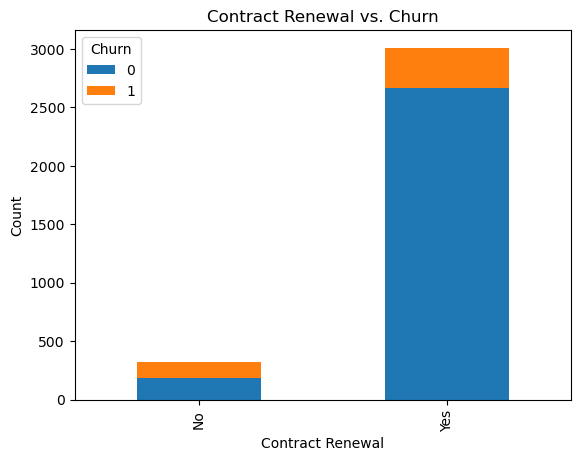

In [17]:
import matplotlib.pyplot as plt

# Bar chart for contract renewal vs churn
churn_counts = df.groupby('ContractRenewal')['Churn'].value_counts().unstack()

# Chart options provided
churn_counts.plot(kind='bar', stacked=True)
plt.title('Contract Renewal vs. Churn')
plt.xlabel('Contract Renewal')
plt.ylabel('Count')
plt.show()

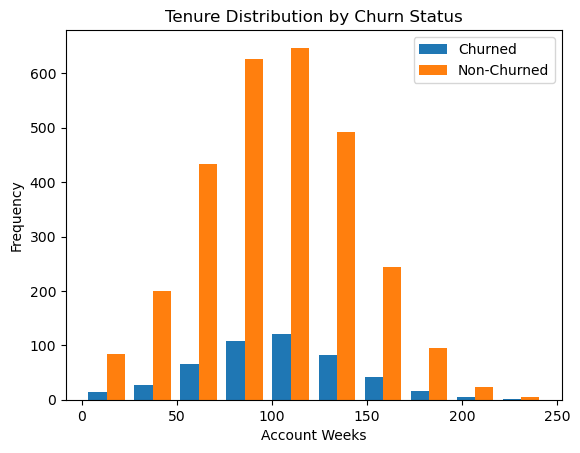

In [18]:
import matplotlib.pyplot as plt

# Histogram for tenure distribution
plt.hist([churned['AccountWeeks'], non_churned['AccountWeeks']], label=['Churned', 'Non-Churned'])

# Chart options provided
plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Account Weeks')
plt.ylabel('Frequency')
plt.legend()
plt.show()

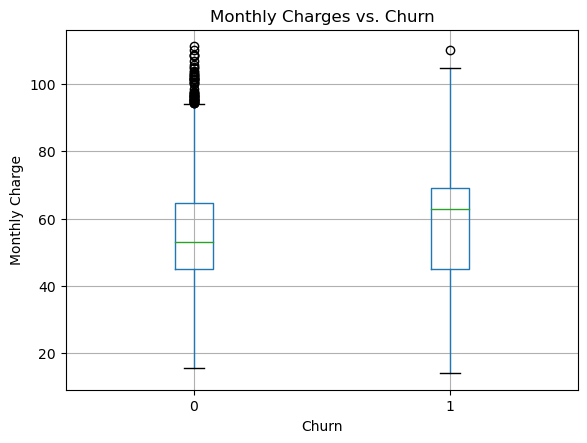

In [20]:
import matplotlib.pyplot as plt

# Box plot for monthly charges
df.boxplot(column='MonthlyCharge', by='Churn')

# Chart options provided
plt.title('Monthly Charges vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charge')
plt.suptitle('')  # Remove the default suptitle
plt.show()

#### Step 3.3: Interpret Visualizations
Interpret the visualizations and identify key insights about factors influencing churn.  Enter your observations in the cell below. These will not be graded, but this may be useful if you want to add this to your portfolio.

Enter your observations about the visualizations here:

- Observation 1: 
- Observation 2: 
- Observation 3: 

### 4. Machine Learning Model Building and Evaluation (20 minutes)
#### Step 4.1: Choose a Classification Algorithm and Train the Model
Import a suitable classification algorithm (`LogisticRegression` in this case) and create an instance of it (provided). 

Setting `max_iter = 1000` in our Logistic Regression model means we're giving it a limit of 1000 attempts to learn the optimal patterns in the data, which is often a good initial value to allow for convergence without excessive training time, though the ideal number can vary depending on the specific dataset.

In [21]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the Logistic Regression model (provided)
model = LogisticRegression(max_iter = 1000)

# Train the model
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

#### Step 4.2: Make Predictions
Use the trained model to make predictions on the testing data.

In [22]:
# Make predictions on the test set
y_pred = model.predict(x_test)

#### Step 4.3: Evaluate the Model
Evaluate the model's performance using appropriate metrics (`accuracy`, `precision`, `recall`, `f1`).

**Note:** For grading purposes, calculate and store each of these metrics in the following variables:
- `accuracy`
- `precision`
- `recall`
- `f1`

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the model
# Round all values to 3 decimal places

accuracy = round(accuracy_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred), 3)
recall = round(recall_score(y_test, y_pred), 3)
f1 = round(f1_score(y_test, y_pred), 3)

print(f"Accuracy: {accuracy}") # Expected: approximately 0.867
print(f"Precision: {precision}") # Expected: approximately 0.604
print(f"Recall: {recall}") # Expected: approximately 0.203
print(f"F1 Score: {f1}") # Expected: approximately 0.304

Accuracy: 0.866
Precision: 0.596
Recall: 0.196
F1 Score: 0.295


#### Check Your Results:

In [24]:
# Checking accuracy
print(f"Accuracy: {accuracy}")

Accuracy: 0.866


In [25]:
# Checking precision
print(f"Precision: {precision}")

Precision: 0.596


In [26]:
# Checking recall
print(f"Recall: {recall}")

Recall: 0.196


In [27]:
# Checking f1
print(f"F1 Score: {f1}")

F1 Score: 0.295


### 5. Presenting Findings in a Comprehensive Report
#### Step 5.1: Compile the Results
Compile your analysis, visualizations, and model evaluation results into a comprehensive report. Fill them in as directed below. This will not be graded, but may be useful if you want to add this to your portfolio.
- `Introduction:` Write a sentence or two describing the purpose of this analysis.
- `Data Exploration:` Write a sentence or two highlighting the key factors in customer churn.
- `Model Building and Evaluation:` Write a sentence or two describing how your model was trained, and the accuracy, precision, and recall rates.
- `Key Insights:` Add two or three bullet points summarizing your findings.
- `Recommendations:` Add two or three bullet points with the recommendations you would make based on this analysis.

# Customer Churn Analysis Report

## Introduction
- 


## Data Exploration
- 


## Model Building and Evaluation
- 


## Key Insights
- 
- 
- 


## Recommendations
- 
- 

## Hints & Tips
- Use the "pandas cheat sheet" for quick syntax reference on DataFrame operations.
- Check the "Scikit-Learn documentation" for examples and explanations of classification models.
- Use Matplotlib for creating informative visualizations. Reference various materials in Course 2.

Good luck with your customer churn analysis!